In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np


In [3]:
# Read the CSV file
#df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/user_demand_cambridge_oct7_2019_week.csv')
#df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/food_demand_cambridge_week.csv')

df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/scattered_rides_ss.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/delivery_demand_ss_1week.csv')

In [4]:
df_user.columns

Index(['Unnamed: 0', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building'],
      dtype='object')

In [5]:
df_user_pt = df_user[['start_lat','start_lon']]
df_food_pt = df_food[['start_latitude','start_longitude']]

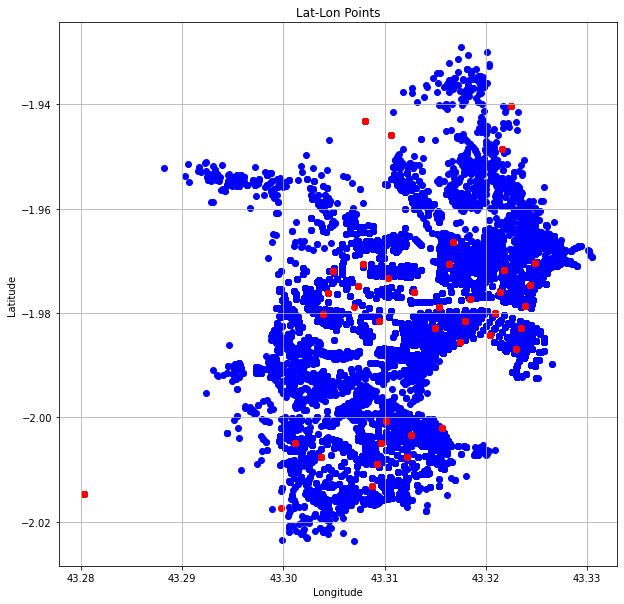

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 10)) 
plt.scatter(df_user_pt['start_lat'], df_user_pt['start_lon'], color='blue', marker='o')
plt.scatter(df_food_pt['start_latitude'], df_food_pt['start_longitude'], color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat-Lon Points')
plt.grid(True)
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


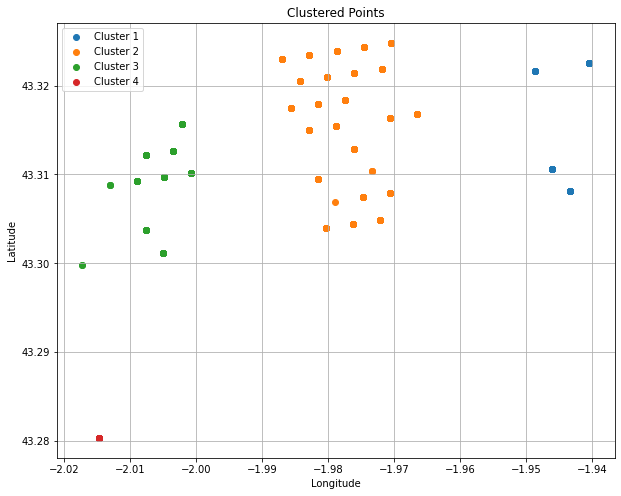

In [14]:
##FOOD CLUSTERS###


# Number of clusters
num_clusters = 4  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_food_pt['cluster'] = kmeans.fit_predict(df_food_pt[['start_latitude', 'start_longitude']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_food_pt[df_food_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_longitude'], cluster_points['start_latitude'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()


KMeans(n_clusters=10, random_state=0)


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


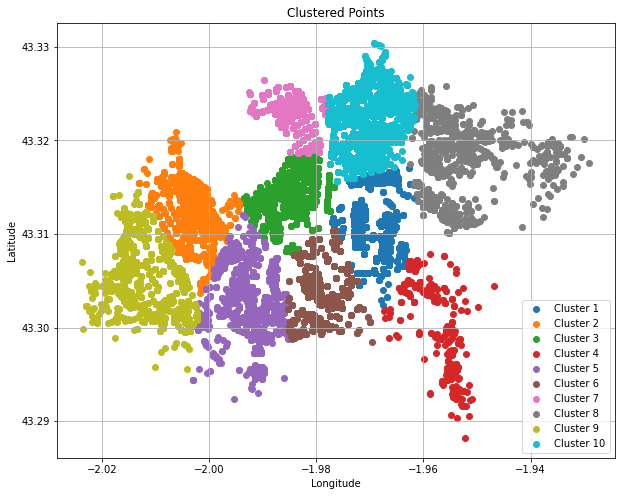

In [12]:
##FOOD CLUSTERS###


# Number of clusters
num_clusters = 10  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

print(kmeans)
df_user_pt['cluster'] = kmeans.fit_predict(df_user_pt[['start_lat', 'start_lon']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_user_pt[df_user_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_lon'], cluster_points['start_lat'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()

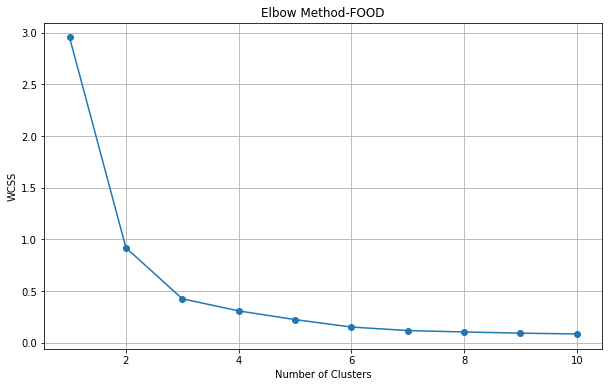

In [13]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_food_pt[['start_latitude', 'start_longitude']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-FOOD')
plt.grid(True)
plt.show()

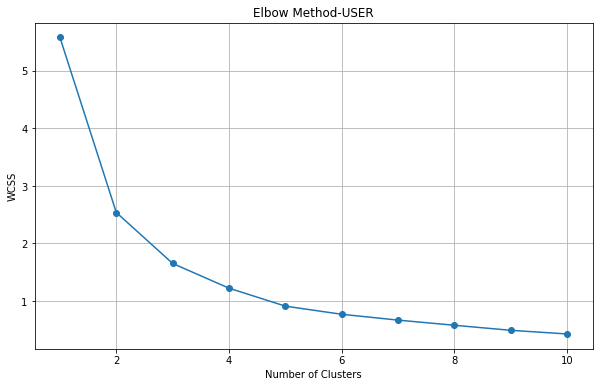

In [14]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_user_pt[['start_lat', 'start_lon']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-USER')
plt.grid(True)
plt.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


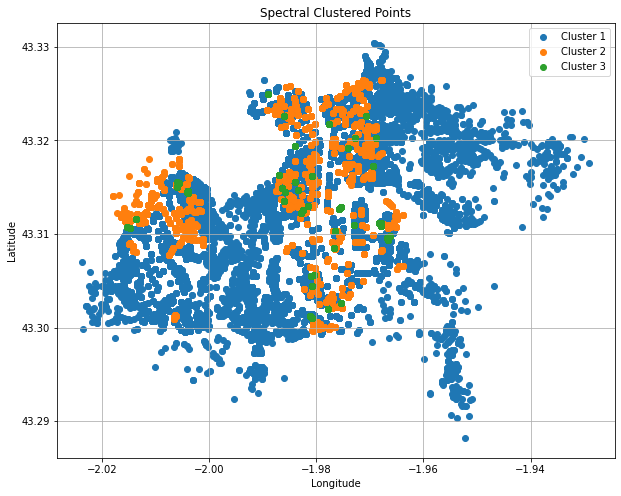

In [15]:
# Preprocessing: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_user_pt[['start_lat', 'start_lon']])

# Number of clusters
num_clusters = 3  # You can adjust this based on your needs

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=0)
df_user_pt['cluster'] = spectral.fit_predict(scaled_data)

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_user_pt[df_user_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_lon'], cluster_points['start_lat'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spectral Clustered Points')
plt.grid(True)
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


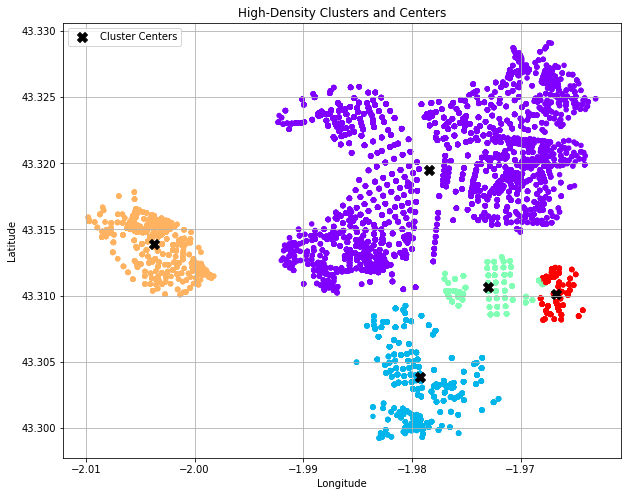

In [16]:


# Preprocessing: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_user[['start_lat', 'start_lon']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=300)  # Adjust eps and min_samples based on your data
df_user_pt['cluster'] = dbscan.fit_predict(scaled_data)

# Extract high-density clusters
df_high_density = df_user_pt[df_user_pt['cluster'] != -1]  # -1 indicates noise points

# Calculate cluster centers
cluster_centers = []
for cluster_num in df_high_density['cluster'].unique():
    cluster_points = df_high_density[df_high_density['cluster'] == cluster_num]
    cluster_center = cluster_points[['start_lat', 'start_lon']].mean()
    cluster_centers.append(cluster_center)

# Visualize high-density clusters and centers
plt.figure(figsize=(10, 8))
plt.scatter(df_high_density['start_lon'], df_high_density['start_lat'], c=df_high_density['cluster'], cmap='rainbow', s=20)
plt.scatter([center['start_lon'] for center in cluster_centers], [center['start_lat'] for center in cluster_centers], color='black', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High-Density Clusters and Centers')
plt.grid(True)
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


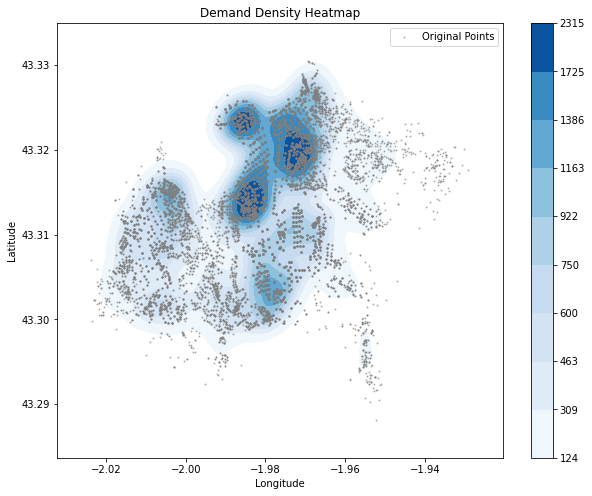

In [17]:
import seaborn as sns


# Create a KDE plot for demand density heatmap
plt.figure(figsize=(10, 8))

#Plot heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)



# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


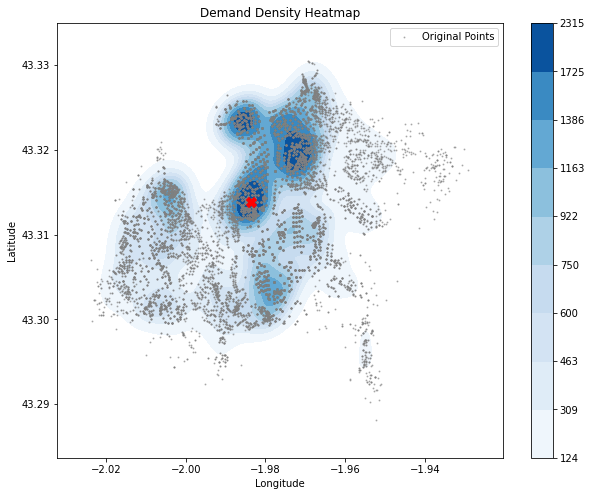

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_user_pt is your DataFrame
X = df_user_pt[['start_lat', 'start_lon']]

plt.figure(figsize=(10, 8))

# Create the KDE plot for demand density heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)

# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()

# Calculate the KDE density values using scipy's gaussian_kde
from scipy.stats import gaussian_kde
kde = gaussian_kde([X['start_lon'], X['start_lat']])
density_values = kde([X['start_lon'], X['start_lat']])

# Find the index of the maximum density value
max_density_index = density_values.argmax()

# Get the corresponding latitude and longitude values
center_lat = X['start_lat'].iloc[max_density_index]
center_lon = X['start_lon'].iloc[max_density_index]

# Mark the center of the highest density area
plt.scatter(center_lon, center_lat, color='red', marker='X', s=100, label='Center of Highest Density Area', zorder=2)

plt.show()



/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


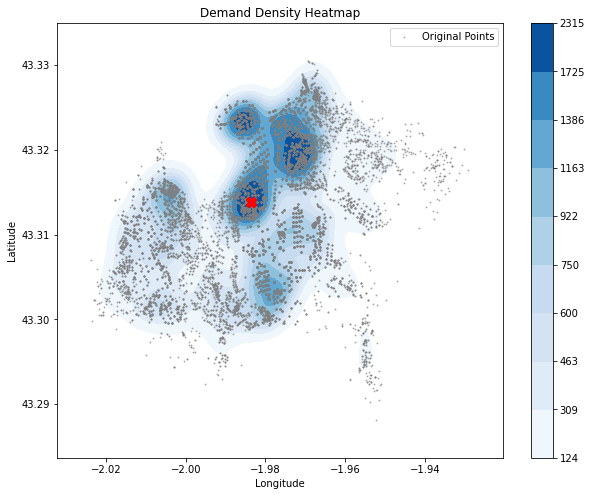

In [19]:


# Assuming df_user_pt is your DataFrame
X = df_user_pt[['start_lat', 'start_lon']]

plt.figure(figsize=(10, 8))

# Create the KDE plot for demand density heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)

# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()

# Calculate the KDE density values using scipy's gaussian_kde
kde = gaussian_kde([X['start_lon'], X['start_lat']])
density_values = kde([X['start_lon'], X['start_lat']])

# Get the indices of the top five density values
top_density_indices = density_values.argsort()[-5:][::-1]

# Get the corresponding latitude and longitude values for the top five areas
top_density_coordinates = X.iloc[top_density_indices]

# Mark the centers of the top five highest density areas
for index, row in top_density_coordinates.iterrows():
    plt.scatter(row['start_lon'], row['start_lat'], color='red', marker='X', s=100, label='Highest Density Area', zorder=2)

plt.show()


In [20]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from geopandas.tools import overlay

# # Convert DataFrame to GeoDataFrame
# geometry = gpd.points_from_xy(df_user_pt['start_lon'], df_user_pt['start_lat'])
# gdf = gpd.GeoDataFrame(df_user_pt, geometry=geometry)

# # Create base map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black')

# # Create hexagonal grid
# hex_grid = gdf.copy()
# hex_grid['geometry'] = hex_grid.geometry.buffer(0.01).convex_hull

# # Spatial join and calculate point density
# joined = overlay(hex_grid, gdf, how='intersection')
# density = joined.groupby('index_right').size().reset_index(name='density')
# hex_grid = hex_grid.merge(density, left_index=True, right_on='index_right', how='left')

# # Plot density
# hex_grid.plot(column='density', ax=ax, legend=True, cmap='YlOrRd', legend_kwds={'label': "Point Density"})
# plt.show()


Exception ignored in: <bound method BaseGeometry.__del__ of <shapely.geometry.point.Point object at 0x7f8b88459438>>
Traceback (most recent call last):
  File "/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/shapely/geometry/base.py", line 242, in __del__
    self.empty(val=None)
KeyboardInterrupt


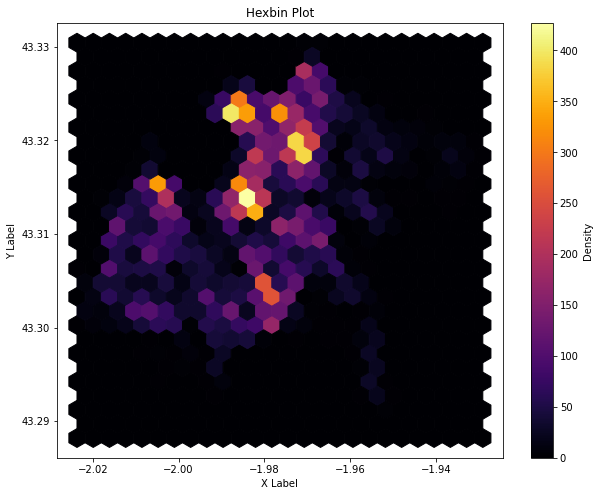

In [15]:
def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()

# Generate hexbin plot
generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')

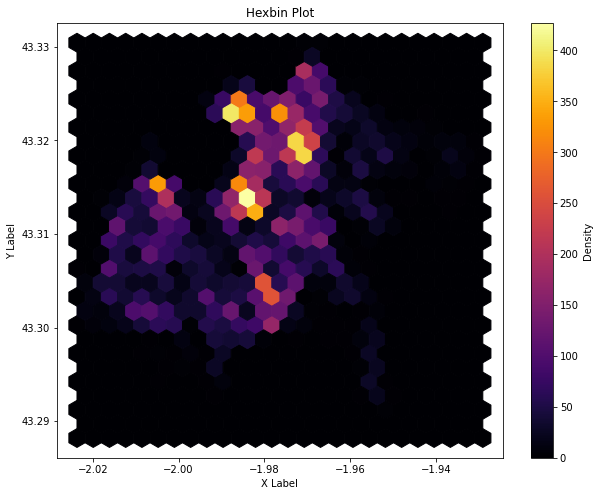

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    plt.show()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    return df_hexbin

# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities = generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')


In [17]:
df_centers_densities

,center_x,center_y,density
0,-2.023665,43.288189,0.0
1,-2.023665,43.291209,0.0
2,-2.023665,43.294228,0.0
3,-2.023665,43.297247,0.0
4,-2.023665,43.300266,2.0
...,...,...,...
735,-1.930953,43.316871,2.0
736,-1.930953,43.319890,3.0
737,-1.930953,43.322909,0.0
738,-1.930953,43.325929,0.0


In [18]:
# Sort the DataFrame by density in descending order and keep the top 10 rows
df_top_10 = df_centers_densities.nlargest(10, 'density')

# Display the DataFrame with the top 10 highest density rows
print(df_top_10)

     center_x   center_y  density
538 -1.983931  43.313852    427.0
527 -1.987716  43.322909    400.0
582 -1.972579  43.319890    385.0
220 -1.970687  43.318381    384.0
173 -1.982039  43.312342    350.0
541 -1.983931  43.322909    334.0
84  -2.004744  43.315362    333.0
569 -1.976363  43.322909    323.0
159 -1.985823  43.315362    316.0
162 -1.985823  43.324419    301.0


In [19]:
#df_top_10.to_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/user_top10density.csv')
df_top_10.to_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/rides_ss_top10density.csv')

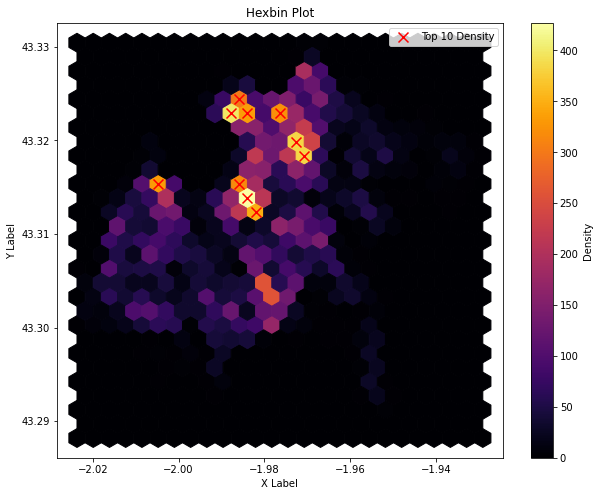

In [20]:

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    # Get the 10 hexbins with highest density
    df_top_10 = df_hexbin.nlargest(10, 'density')
    
    # Plot the hexbin centers with highest density
    ax.scatter(df_top_10['center_x'], df_top_10['center_y'], color='red', marker='x', s=100, label='Top 10 Density')
    ax.legend()
    
    plt.show()
    
    return df_hexbin

# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities = generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')


In [21]:
df_centers_densities

,center_x,center_y,density
0,-2.023665,43.288189,0.0
1,-2.023665,43.291209,0.0
2,-2.023665,43.294228,0.0
3,-2.023665,43.297247,0.0
4,-2.023665,43.300266,2.0
...,...,...,...
735,-1.930953,43.316871,2.0
736,-1.930953,43.319890,3.0
737,-1.930953,43.322909,0.0
738,-1.930953,43.325929,0.0


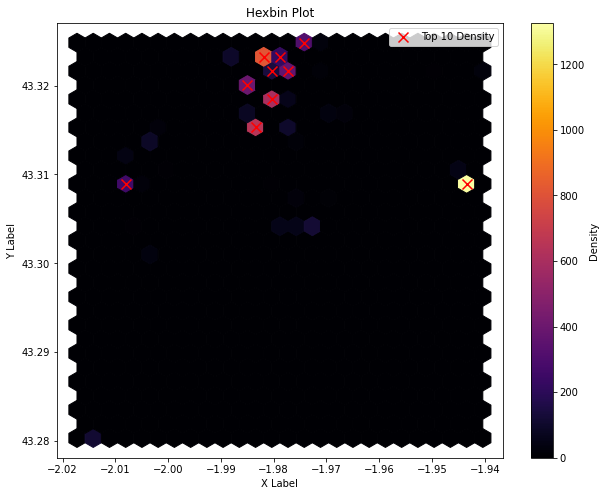

In [26]:

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    # Get the 10 hexbins with highest density
    df_top_10_food = df_hexbin.nlargest(10, 'density')
    
    # Plot the hexbin centers with highest density
    ax.scatter(df_top_10_food['center_x'], df_top_10_food['center_y'], color='red', marker='x', s=100, label='Top 10 Density')
    ax.legend()
    
    plt.show()
    
    return df_hexbin



# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities_food = generate_hexbin_plot(df_food_pt['start_longitude'], df_food_pt['start_latitude'], 'X Label', 'Y Label', 'Hexbin Plot')


In [27]:
df_centers_densities_food

,center_x,center_y,density
0,-2.017269,43.280326,0.0
1,-2.017269,43.283504,0.0
2,-2.017269,43.286683,0.0
3,-2.017269,43.289861,0.0
4,-2.017269,43.293039,0.0
...,...,...,...
735,-1.941905,43.310520,0.0
736,-1.941905,43.313698,0.0
737,-1.941905,43.316876,0.0
738,-1.941905,43.320055,0.0


In [28]:
# Sort the DataFrame by density in descending order and keep the top 10 rows
df_top_10_food = df_centers_densities_food.nlargest(10, 'density')

# Display the DataFrame with the top 10 highest density rows
print(df_top_10_food)

     center_x   center_y  density
369 -1.943443  43.308931   1326.0
557 -1.981894  43.323233    815.0
176 -1.983432  43.315287    652.0
192 -1.980356  43.318465    605.0
542 -1.984970  43.320055    394.0
208 -1.977280  43.321644    369.0
224 -1.974204  43.324822    311.0
54  -2.008041  43.308931    264.0
571 -1.978818  43.323233    225.0
193 -1.980356  43.321644    142.0


In [29]:
#df_top_5.to_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/food_top5density.csv')
df_top_10_food.to_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/deliveries_ss_top10density.csv')